## Problem Statement

We have given a collection of 8 points.

P1=[0.1,0.6] ,P2=[0.15,0.71], P3=[0.08,0.9] P4=[0.16, 0.85],
P5=[0.2,0.3], P6=[0.25,0.5], P7=[0.24,0.1], P8=[0.3,0.2].

Perform the k-mean clustering with initial centroids as m1=P1 =
Cluster#1=C1 and m2=P8=cluster#2=C2.

Answer the following
1. Which cluster does P6 belong to?
2. What is the population of cluster around m2?
3. What is updated value of m1 and m2?

## Bloom's Taxonomy

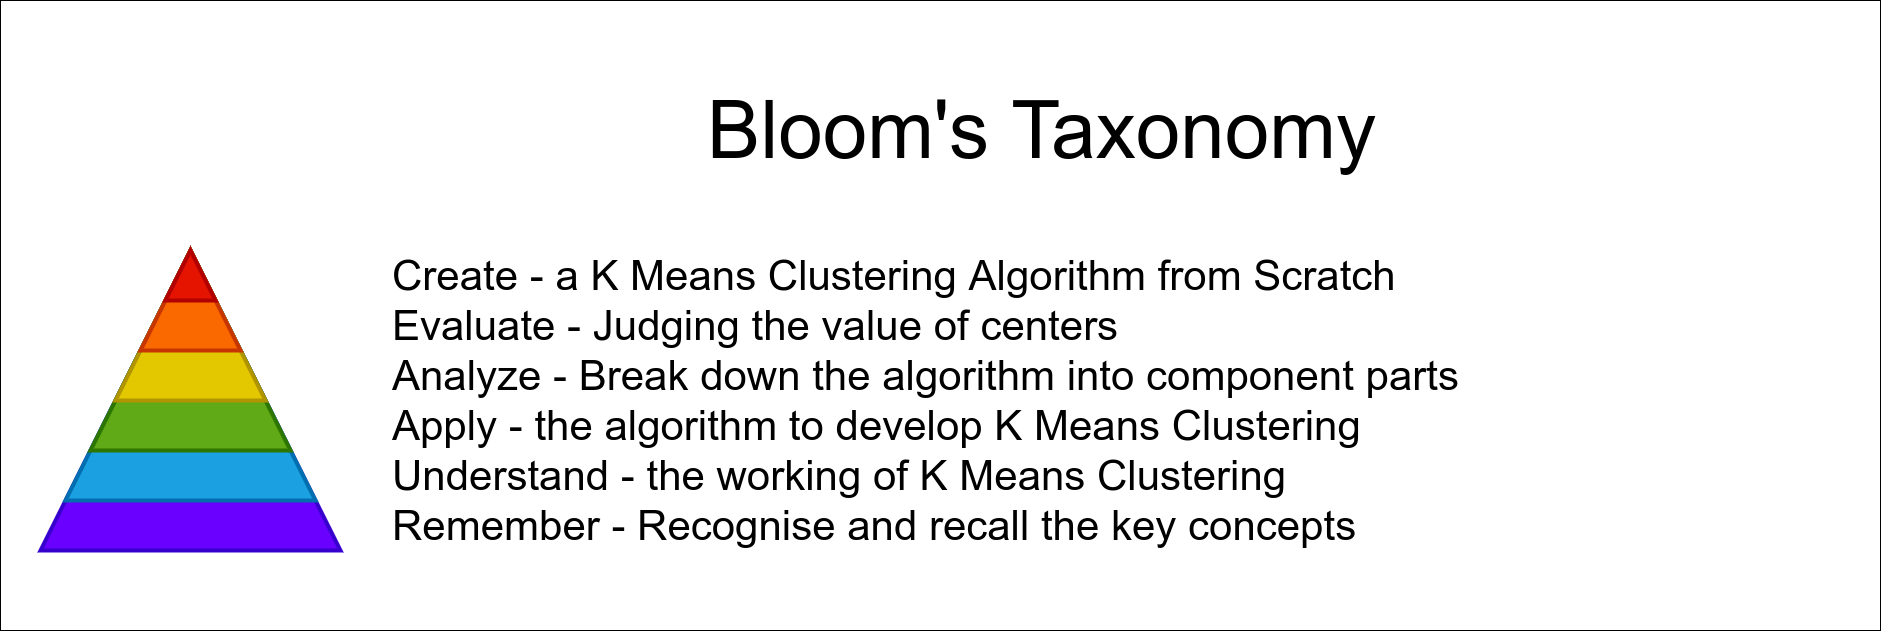

## K Means Clustering Key Points

* Unsupervised Machine Learning Algorithm

* Partition Clustering

* k = number of classes, k>2

* A cluster is a collection of data points aggregated together because of certain similarities.

* in the beginning the centroids are taken randomly

* ends when
  * centroids have stabilized
  * iteration has exceeded the limit

* k can be determined using elbow method
  * Plot a graph of k vs Distortion
  * Identify the Elbow of the curve

* Advantages
  * Relatively simple to implement.
  * Scales to large data sets.
  * Guarantees convergence.

* Disadvantages
  * Choosing k manually
  * Clustering data of varying sizes and density.
  * Clustering outliers.
  * Curse of Dimensionality
  * Dependant on initial cluster center values

## K Means Clustering Algorithm

### Algorithm
1. for each datapoint in dataset

  1.1 for each center in centers

    * 1.1.1. get distance between datapoint and center

  1.2 select center closest to datapoint
  
  1.3 assign cluster based on closest center

2. for each cluster

  2.1 assign new center as centroid of datapoints in cluster

3. if new centers = old centers then return new centers else go to step 1

## Mathematical Model/ Programmers' Perspective

> S = {s; e; X; Y; Fme; Ff; DD; NDD}

* s = {datapoints, centers, k}
  * datapoints = { {x,y} | x∈R, y∈R, 0<x<1, 0<y<1 }
  * |datapoints| = 8
  * centers = { {x,y} | x∈R, y∈R, 0<x<1, 0<y<1 }
  * |centers| = k
  * k = { x | x∈N, x>2 }

* e = {query1, query2, query3}
  * query1 ∈ {0,1}
  * query2 = |{x | x∈datapoints, center(x)=m2 }|
  * query3 = centers

* X = {datapoints, k}
  * datapoints = { {x,y} | x∈R, y∈R, 0<x<1, 0<y<1 }
  * |datapoints| = 8
  * k = { x | x∈N, x>2 }

* Y = {centers}
  * centers = { {x,y} | x∈R, y∈R, 0<x<1, 0<y<1 }
  * |centers| = k

* Fme = {f0}
 * f0 = function to perform K means clustering

* Ff = {f1} where
 * f1 = function to validate dataset and queries

* DD = X (Dataset)

## State Diagram

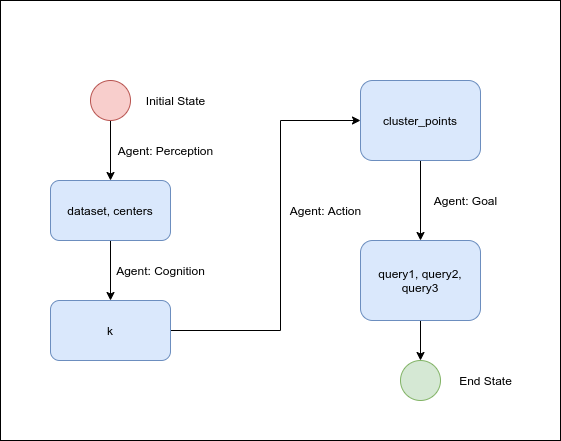

## Class Diagram

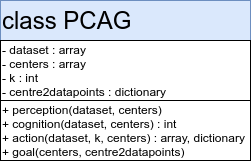

In [ ]:
class PCAG:


  def __init__(self, dataset, centers):
    dataset, centers = self.perception(dataset, centers)
    k = self.cognition(centers)
    centers, center2datapoints = self.action(dataset, k, centers)
    self.goal(dataset, centers, center2datapoints)
    pass
  

  def perception(self, dataset, centers):
    print('\nPERCEPTION\n============\nValidating the dataset and the cluster centers')
    print('\n...Validating the dataset')
    for x,y in dataset:
      assert type(x)==int or  type(x)==float 
      assert type(y)==int or  type(y)==float
    print('Dataset successfully validated')
    print('#dataset =',len(dataset))
    print('\n...Validating the cluster centers')
    for x,y in centers:
      assert type(x)==int or  type(x)==float 
      assert type(y)==int or  type(y)==float
    print('Cluster centers successfully validated')
    print('#centers =',len(centers))
    assert len(dataset) >= len(centers)
    return dataset, centers
  

  def cognition(self, centers):
    print('\nCOGNITION\n============')
    assert len(centers)>1
    print('k = {k}'.format(k=len(centers)))
    return len(centers)
  

  def action(self, dataset, k, centers):
    print('\nACTION - K Means Clustering\n============')

    from math import sqrt
    import matplotlib.pyplot as plt

    centers_old = centers.copy()
    #iteration_count = 1

    for iteration_count in range(0,5):

      print('\nIteration Count = {iter}'.format(iter=iteration_count))

      print('Centers = {centers}'.format(centers=centers_old))

      # Get datapoints closest to the cluster center
      center2datapoints = {}
      cluster = []

      # For each datapoint
      for datapoint in dataset:

        # Get distance of datapoint from each cluster center
        center2distance = {}

        # For each cluster center
        for center_index, center in enumerate(centers_old):

          # Calculate distance
          distance = 0
          for datapoint_dim, center_dim in zip(datapoint,center):
            distance = distance + (datapoint_dim-center_dim)**2
          distance = distance**0.5

          # Save the distance
          center2distance[center_index] = distance

        # Find closest center to the datapoint
        closest_center_index = 0
        closest_center_distance = center2distance[closest_center_index]
        for center_index in center2distance:
          if center2distance[center_index] < closest_center_distance:
            closest_center_index = center_index
            closest_center_distance = center2distance[center_index]
        cluster.append(closest_center_index)
        
        print()
        print('\tDatapoint = {datapoint}'.format(datapoint=datapoint))
        print('\tDistance from each cluster centre  = {center2distance}'.format(center2distance=center2distance))
        print('\tClosest Center = {closest_center_index}'.format(closest_center_index=closest_center_index))


        # Save datapoint to nearest center in center2datapoints
        if closest_center_index not in center2datapoints:
          center2datapoints[closest_center_index] = [datapoint]
        else:
          center2datapoints[closest_center_index].append(datapoint)

      # Compute new centers by taking center of each set of datapoints in center2datapoints
      centers_new = []
      for center_index in center2datapoints:
        nearest_datapoints = center2datapoints[center_index]
        x_center, y_center = 0, 0
        for x,y in nearest_datapoints:
          x_center, y_center = x_center+x, y_center+y
        x_center, y_center = x_center/len(nearest_datapoints), y_center/len(nearest_datapoints)
        centers_new.append((x_center,y_center))
      
      '''
      plt.scatter([x for x,y in dataset],[y for x,y in dataset],c=cluster)
      plt.scatter([x for x,y in centers_old],[y for x,y in centers_old],c='red')
      plt.scatter([x for x,y in centers_new],[y for x,y in centers_new],c='orange')
      plt.show()
      '''

      print()
      print('Old Centers = {centers}'.format(centers=centers_old))
      print('New Centers = {centers}'.format(centers=centers_new))

      
      # Compare the old and the new centers, break the loop if no change
      if centers_old == centers_new:
        return centers_old, center2datapoints
      else:
        centers_old = centers_new
        
      centers_old = centers_new

    return centers_old, center2datapoints

  
  def goal(self, dataset, centers, center2datapoints):
    print('\nGOAL\n============\nAnswering the Queries')

    query1 = -1
    for center in center2datapoints:
      if dataset[5] in center2datapoints[center]:
        query1 = center
        break
    print('Which cluster does P6 belong to? --> ',query1)

    query2 = len(center2datapoints[1])
    print('What is the population of cluster around m2? --> ',query2)

    query3 = centers
    print('What is updated value of m1 and m2? --> ',query3)


################################################################################
dataset = [
  (0.1,0.6),
  (0.15,0.71),
  (0.08,0.9),
  (0.16, 0.85),
  (0.2,0.3),
  (0.25,0.5),
  (0.24,0.1),
  (0.3,0.2)
]
centers = [
  (0.1,0.6),
  (0.3,0.2)
]
pcag = PCAG(dataset, centers)


PERCEPTION
Validating the dataset and the cluster centers

...Validating the dataset
Dataset successfully validated
#dataset = 8

...Validating the cluster centers
Cluster centers successfully validated
#centers = 2

COGNITION
k = 2

ACTION - K Means Clustering

Iteration Count = 0
Centers = [(0.1, 0.6), (0.3, 0.2)]

	Datapoint = (0.1, 0.6)
	Distance from each cluster centre  = {0: 0.0, 1: 0.44721359549995787}
	Closest Center = 0

	Datapoint = (0.15, 0.71)
	Distance from each cluster centre  = {0: 0.12083045973594571, 1: 0.5316013544000805}
	Closest Center = 0

	Datapoint = (0.08, 0.9)
	Distance from each cluster centre  = {0: 0.3006659275674582, 1: 0.7337574531137656}
	Closest Center = 0

	Datapoint = (0.16, 0.85)
	Distance from each cluster centre  = {0: 0.2570992026436488, 1: 0.6649060083951716}
	Closest Center = 0

	Datapoint = (0.2, 0.3)
	Distance from each cluster centre  = {0: 0.31622776601683794, 1: 0.14142135623730948}
	Closest Center = 1

	Datapoint = (0.25, 0.5)
	Distance f

In [ ]:
class KMeans:


  def __init__(self, dataset, centers):
    k = len(centers)
    centers, center2datapoints = self.action(dataset, k, centers)
    pass
  

  def action(self, dataset, k, centers):
    print('\nK Means Clustering\n============')

    from math import sqrt
    import matplotlib.pyplot as plt

    centers_old = centers.copy()
    #iteration_count = 1

    for iteration_count in range(0,5):

      print('\nIteration Count = {iter}'.format(iter=iteration_count))

      print('Centers = {centers}'.format(centers=centers_old))

      # Get datapoints closest to the cluster center
      center2datapoints = {}
      cluster = []

      # For each datapoint
      for datapoint in dataset:

        # Get distance of datapoint from each cluster center
        center2distance = {}

        # For each cluster center
        for center_index, center in enumerate(centers_old):

          # Calculate distance
          distance = 0
          for datapoint_dim, center_dim in zip(datapoint,center):
            distance = distance + (datapoint_dim-center_dim)**2
          distance = distance**0.5

          # Save the distance
          center2distance[center_index] = distance

        # Find closest center to the datapoint
        closest_center_index = 0
        closest_center_distance = center2distance[closest_center_index]
        for center_index in center2distance:
          if center2distance[center_index] < closest_center_distance:
            closest_center_index = center_index
            closest_center_distance = center2distance[center_index]
        cluster.append(closest_center_index)
        
        print()
        print('\tDatapoint = {datapoint}'.format(datapoint=datapoint))
        print('\tDistance from each cluster centre  = {center2distance}'.format(center2distance=center2distance))
        print('\tClosest Center = {closest_center_index}'.format(closest_center_index=closest_center_index))


        # Save datapoint to nearest center in center2datapoints
        if closest_center_index not in center2datapoints:
          center2datapoints[closest_center_index] = [datapoint]
        else:
          center2datapoints[closest_center_index].append(datapoint)

      # Compute new centers by taking center of each set of datapoints in center2datapoints
      centers_new = []
      for center_index in center2datapoints:
        nearest_datapoints = center2datapoints[center_index]
        x_center, y_center = 0, 0
        for x,y in nearest_datapoints:
          x_center, y_center = x_center+x, y_center+y
        x_center, y_center = x_center/len(nearest_datapoints), y_center/len(nearest_datapoints)
        centers_new.append((x_center,y_center))
      
      '''
      plt.scatter([x for x,y in dataset],[y for x,y in dataset],c=cluster)
      plt.scatter([x for x,y in centers_old],[y for x,y in centers_old],c='red')
      plt.scatter([x for x,y in centers_new],[y for x,y in centers_new],c='orange')
      plt.show()
      '''

      print()
      print('Old Centers = {centers}'.format(centers=centers_old))
      print('New Centers = {centers}'.format(centers=centers_new))

      
      # Compare the old and the new centers, break the loop if no change
      if centers_old == centers_new:
        return centers_old, center2datapoints
      else:
        centers_old = centers_new
        
      centers_old = centers_new

    return centers_old, center2datapoints


################################################################################
dataset = [
  (0.1,0.6),
  (0.15,0.71),
  (0.08,0.9),
  (0.16, 0.85),
  (0.2,0.3),
  (0.25,0.5),
  (0.24,0.1),
  (0.3,0.2)
]
centers = [
  (0.1,0.6),
  (0.3,0.2)
]
kmeans = KMeans(dataset, centers)


K Means Clustering

Iteration Count = 0
Centers = [(0.1, 0.6), (0.3, 0.2)]

	Datapoint = (0.1, 0.6)
	Distance from each cluster centre  = {0: 0.0, 1: 0.44721359549995787}
	Closest Center = 0

	Datapoint = (0.15, 0.71)
	Distance from each cluster centre  = {0: 0.12083045973594571, 1: 0.5316013544000805}
	Closest Center = 0

	Datapoint = (0.08, 0.9)
	Distance from each cluster centre  = {0: 0.3006659275674582, 1: 0.7337574531137656}
	Closest Center = 0

	Datapoint = (0.16, 0.85)
	Distance from each cluster centre  = {0: 0.2570992026436488, 1: 0.6649060083951716}
	Closest Center = 0

	Datapoint = (0.2, 0.3)
	Distance from each cluster centre  = {0: 0.31622776601683794, 1: 0.14142135623730948}
	Closest Center = 1

	Datapoint = (0.25, 0.5)
	Distance from each cluster centre  = {0: 0.18027756377319945, 1: 0.30413812651491096}
	Closest Center = 0

	Datapoint = (0.24, 0.1)
	Distance from each cluster centre  = {0: 0.5192301994298868, 1: 0.11661903789690602}
	Closest Center = 1

	Datapoint = (

##References 

1. https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages